## Load MNIST on Python 3.x

In [87]:
import pickle
import gzip
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, testing_data = pickle.load(f, encoding='latin1')

train_data=np.array(training_data[0])
train_target=np.array(training_data[1])
valid_data=np.array(validation_data[0])
valid_target=np.array(validation_data[1])
test_data=np.array(testing_data[0])
test_target=np.array(testing_data[1])

print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

print(train_target.shape)
print(valid_target.shape)
print(test_target.shape)
f.close()

(50000, 784)
(10000, 784)
(10000, 784)
(50000,)
(10000,)
(10000,)


## Load USPS on Python 3.x

In [3]:
from PIL import Image
import os


In [4]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
print(np.array(USPSMat).shape)
print(np.array(USPSTar).shape)
USPS_data=np.array(USPSMat)
USPS_Target=np.array(USPSTar)

(19999, 784)
(19999,)


# Softmax Logistic Regression

In [54]:
#Softmax function

def softmax(t):
    probability_matrix = []
    for i in range(len(t)):
        probability_vector = []
        sum_exp = 0
        for j in t[i]:
            sum_exp += np.exp(j)
        for k in t[i]:
            probability_vector.append(float(np.exp(k))/sum_exp)
        probability_matrix.append(probability_vector)
    return np.array(probability_matrix)

In [6]:
#One Hot Encoding
import scipy.sparse
def oneHotEncoding(Y):
    m = Y.shape[0]

    oneHot = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    oneHot = np.array(oneHot.todense()).T
    return oneHot
   

In [7]:
oneHotTestTarget=oneHotEncoding(test_target)
oneHotValidTarget=oneHotEncoding(valid_target)
oneHotTrainTarget=oneHotEncoding(train_target)
print(oneHotTrainTarget.shape)
print(oneHotValidTarget.shape)
print(oneHotTestTarget.shape)
print(train_data.shape[0])

(50000, 10)
(10000, 10)
(10000, 10)
50000


In [42]:

def add_bias(data):
    data=np.hstack((np.zeros(shape=(data.shape[0],1), dtype='float') + 1, data))
    return data


def getGradientandLoss(w,x,y,lamda,bias):
    m = x.shape[0] # number of training examples
    y_mat = oneHotEncoding(y) #integer class coding into a one-hot representation
    x=add_bias(x) #adding bias to the dataset
    z = np.dot(x,w)
    
    #print(z[10000])
    
    #perform a softmax to get their probabilities
    prob = softmax(z)
    #print(prob.shape)
    loss = (-1 / m) * np.sum(y_mat * np.log(prob)) + (lamda/2)*np.sum(w*w) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(x.T,(y_mat - prob)) + lamda*w #compute the gradient for that loss
    return loss,grad

In [9]:
def getPrediction(data):
    prob = softmax(np.dot(data,w))
    pred = np.argmax(prob,axis=1)
    return prob,pred

print(train_data.shape[1])
print(len(np.unique(train_target)))

784
10


In [95]:
#Mini-batch stochastic gradient descent

batch_size=100
no_of_batches=500
w = np.zeros([train_data.shape[1]+1,len(np.unique(train_target))])
b = np.zeros([batch_size,len(np.unique(train_target))])
train_data_batched=np.split(train_data, no_of_batches)
train_target_batched=np.split(train_target, no_of_batches)
lamda = 0.0001#10
epochs = 100#
learningRate = 1e-3
losses = []
for i in range(0,epochs):
    for j in range(0,no_of_batches):
        train_data_b=train_data_batched[j]
        train_target_b=train_target_batched[j]
        loss,grad = getGradientandLoss(w,train_data_b,train_target_b,lamda,b)
        
        w = w - (learningRate * grad)
    losses.append(loss)
print(loss)

0.4626749604042896


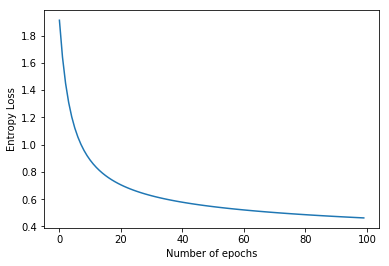

In [101]:
import matplotlib.pyplot as plt
plt.xlabel("Number of epochs")
plt.ylabel("Entropy Loss")
plt.plot(losses)

In [46]:
from sklearn.metrics import confusion_matrix
def getAccuracy(data,target):
    probability,prede = getPrediction(data)
    
    
    accuracy = sum(prede == target)/(float(len(target)))
    return prede,accuracy

In [97]:
training_pred,training_acc=getAccuracy(add_bias(train_data),train_target)
valid_pred,valid_acc=getAccuracy(add_bias(valid_data),valid_target)
softmaxMNISTPred,softmaxMNISTAcc = getAccuracy(add_bias(test_data),test_target)
softmaxUSPSPred,softmaxUSPSAcc = getAccuracy(add_bias(USPS_data),USPS_Target)


In [98]:
print ('----------Softmax Logistic Regression --------------------')
print ('----------Mini Batch Stochastic Gradient Descent --------------------')
print ('UBITname      = APURBAMA')
print ('Person Number = 50288705')

print("Training Accuracy "+ str(training_acc*100))
print("Validation Accuracy "+ str(valid_acc*100))
print ('---------- MNIST Confusion Matrix--------------------')
print(confusion_matrix(test_target, softmaxMNISTPred))
print("Testing MNIST Accuracy "+ str(softmaxMNISTAcc*100))
print ('---------- USPS Confusion Matrix--------------------')
print(confusion_matrix(USPS_Target, softmaxUSPSPred))
print("Testing USPS Accuracy "+ str(softmaxUSPSAcc*100))

----------Softmax Logistic Regression --------------------
----------Mini Batch Stochastic Gradient Descent --------------------
UBITname      = APURBAMA
Person Number = 50288705
Training Accuracy 89.32
Validation Accuracy 90.52
---------- MNIST Confusion Matrix--------------------
[[ 957    0    3    3    0    2    8    1    6    0]
 [   0 1103    2    4    1    2    4    0   19    0]
 [  11    6  891   18   16    0   17   22   42    9]
 [   6    1   18  898    1   31    6   15   22   12]
 [   2    6    5    0  901    1   10    2    8   47]
 [  15    6    4   43   15  733   17   10   38   11]
 [  16    3    6    2   13   15  897    1    5    0]
 [   3   20   28    4   11    0    0  918    4   40]
 [   9   10   10   29    7   26   13   14  840   16]
 [  13    8    6   10   44   16    0   23    7  882]]
Testing MNIST Accuracy 90.2
---------- USPS Confusion Matrix--------------------
[[ 593    4  372   53  272  131  102   44  123  306]
 [ 227  329  138  342  280   65   44  328  231   16]

In [99]:
print("-------Classification report MNIST-------")
print(classification_report(test_target, softmaxMNISTPred))
print("-------Classification report USPS-------")
print(classification_report(USPS_Target, softmaxUSPSPred))

-------Classification report MNIST-------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       980
           1       0.95      0.97      0.96      1135
           2       0.92      0.86      0.89      1032
           3       0.89      0.89      0.89      1010
           4       0.89      0.92      0.91       982
           5       0.89      0.82      0.85       892
           6       0.92      0.94      0.93       958
           7       0.91      0.89      0.90      1028
           8       0.85      0.86      0.85       974
           9       0.87      0.87      0.87      1009

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

-------Classification report USPS-------
              precision    recall  f1-score   support

           0       0.28      0.30      0.29      2000
           1       0.35      0.16      0.22      

# Neural Network Implementation


In [15]:
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, TensorBoard

Using TensorFlow backend.


In [16]:
def genMNISTModel(RawData):
    input_size = RawData.shape[1]
    drop_out = 0.2
    first_dense_layer_nodes  = 128 
    second_dense_layer_nodes = 64
    
    third_dense_layer_nodes = 10


    model = Sequential()
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dropout(drop_out))



    model.add(Dense(second_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))

    model.add(Dropout(drop_out))

    model.add(Dense(third_dense_layer_nodes))
    model.add(Activation('softmax'))


    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()
    return model
MNISTmodel=genMNISTModel(train_data)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
__________

In [17]:
from keras.utils import np_utils
def runMNISTModel(train_data,train_target,model):
    
    validation_data_split = 0.2 # This is the validation data split ratio from the training set .This means last 20% of
# data will be used as the validation set.
    num_epochs = 50 # epochs are the number of datasets given to the model to learn.Changing to 1000 for 3 dense layers
# as accuracy is reaching 0.99 in the first 200 epochs only   
    model_batch_size = 100 # No of training examples used per iteration
    tb_batch_size = 32 # batch_size used in callback functions to get the statistics of the model that is getting trained
    early_patience = 25 # no of epochs with no improvement after which training is stopped

# EarlyStopping is used to stop the training when a monitored value stops improving.
    tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
    earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

    TrainingData = train_data
    TrainingTarget = train_target
    TargetVector = np_utils.to_categorical(TrainingTarget,10)
    #print(TrainingData)
    history = model.fit(TrainingData
                    , TargetVector
                    , validation_data=(valid_data,np_utils.to_categorical(valid_target,10))
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )
    return history

history=runMNISTModel(train_data,train_target,MNISTmodel)


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 20s 410us/step - loss: 0.4750 - acc: 0.8550 - val_loss: 0.1719 - val_acc: 0.9516
Epoch 2/50
50000/50000 [==============================] - 23s 467us/step - loss: 0.2096 - acc: 0.9389 - val_loss: 0.1212 - val_acc: 0.9643
Epoch 3/50
50000/50000 [==============================] - 25s 500us/step - loss: 0.1585 - acc: 0.9534 - val_loss: 0.1012 - val_acc: 0.9702
Epoch 4/50
50000/50000 [==============================] - 23s 453us/step - loss: 0.1322 - acc: 0.9600 - val_loss: 0.0929 - val_acc: 0.9722
Epoch 5/50
50000/50000 [==============================] - 20s 408us/step - loss: 0.1111 - acc: 0.9666 - val_loss: 0.0803 - val_acc: 0.9738
Epoch 6/50
50000/50000 [==============================] - 22s 434us/step - loss: 0.0980 - acc: 0.9695 - val_loss: 0.0812 - val_acc: 0.9752
Epoch 7/50
50000/50000 [==============================] - 24s 478us/step - loss: 0.0872 - acc: 0.9729 - val_loss: 0.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a43be5e48>,
      dtype=object)

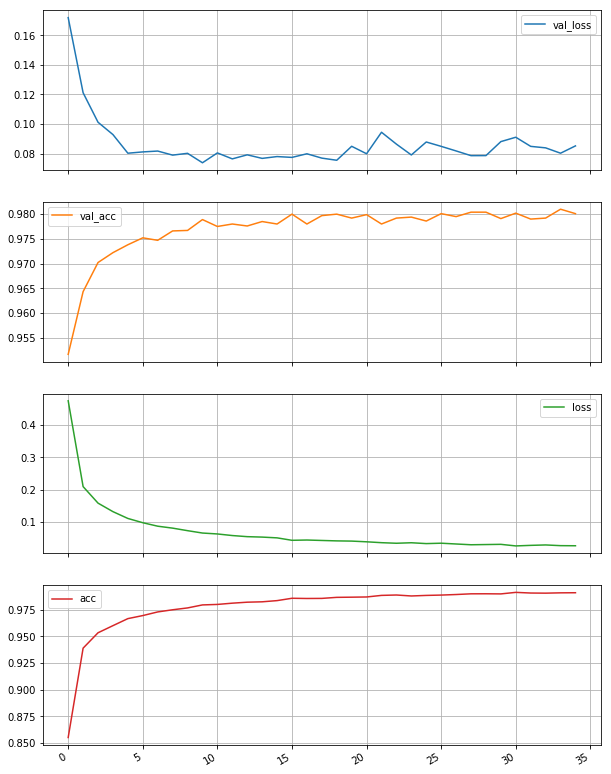

In [18]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [19]:
mnistNNPredictions = np.argmax(MNISTmodel.predict(test_data),axis=1)
uspsNNPredictions = np.argmax(MNISTmodel.predict(USPS_data),axis=1)


In [20]:
from sklearn.metrics import confusion_matrix
right   = 0
uright = 0 
mnistPredictions = MNISTmodel.predict(test_data)
mnist_target = np_utils.to_categorical(test_target, 10)

uspsPrediction = MNISTmodel.predict(USPS_data)
usps_target = np_utils.to_categorical(USPS_Target, 10)

for i in range(0,len(mnistPredictions)):
    if(mnist_target[i].argmax()==mnistPredictions[i].argmax()):
        right=right+1

for i in range(0,len(uspsPrediction)):
    if(usps_target[i].argmax()==uspsPrediction[i].argmax()):
        uright=uright+1        
        
print ('----------Keras Neural Network MNIST Data Prediction --------------------')
print ('UBITname      = APURBAMA')
print ('Person Number = 50288705')        
print("MNIST Testing Accuracy =" +str(right/len(mnistPredictions)*100)   ) 
print("USPS Testing Accuracy =" +str(uright/len(uspsPrediction)*100)   ) 

print ('---------- MNIST Testing Confusion Matrix--------------------')
print(confusion_matrix(test_target, np.argmax(mnistPredictions,axis=1)))

print ('---------- USPS Testing Confusion Matrix--------------------')
print(confusion_matrix(USPS_Target, np.argmax(uspsPrediction,axis=1)))

----------Keras Neural Network MNIST Data Prediction --------------------
UBITname      = APURBAMA
Person Number = 50288705
MNIST Testing Accuracy =98.15
USPS Testing Accuracy =45.862293114655735
---------- MNIST Testing Confusion Matrix--------------------
[[ 971    1    0    2    0    1    3    1    1    0]
 [   0 1128    2    1    0    0    3    0    1    0]
 [   2    0 1017    3    1    0    1    4    3    1]
 [   0    0    4  997    0    2    0    4    3    0]
 [   0    0    1    0  966    0    3    2    2    8]
 [   2    0    0   13    0  866    4    1    4    2]
 [   3    2    1    0    2    4  943    0    3    0]
 [   2    5    8    3    0    0    0 1005    0    5]
 [   0    1    4   12    3    3    0    5  942    4]
 [   1    2    0    7   10    2    0    7    0  980]]
---------- USPS Testing Confusion Matrix--------------------
[[ 455    9   97   58   80  428  258  252   33  330]
 [  10  433  562  106  185  103   17  444   59   81]
 [  15   13 1596   82   11  135   75   42   

In [91]:
print("-------Classification report MNIST-------")
print(classification_report(test_target, mnistNNPredictions))
print("-------Classification report USPS-------")
print(classification_report(USPS_Target, uspsNNPredictions))

-------Classification report MNIST-------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.98      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

-------Classification report USPS-------
              precision    recall  f1-score   support

           0       0.65      0.23      0.34      2000
           1       0.50      0.22      0.30      

# SVM CLassifier Implementation


In [21]:
from sklearn import datasets, svm, metrics

classifier = svm.SVC(C=200,kernel='linear',gamma=0.05)
classifier.fit(train_data,train_target)

SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
mnist_pred_svm = classifier.predict(test_data)
usps_pred_svm = classifier.predict(USPS_data)

In [23]:


accuracy_svm = accuracy_score(test_target, mnist_pred_svm)

print ('UBITname      = APURBAMA')
print ('Person Number = 50288705')
print("--------Linear SVM MNIST accuracy------------")
print(accuracy_svm*100)
print ('---------- Confusion Matrix--------------------')
print(confusion_matrix(test_target, mnist_pred_svm))


UBITname      = APURBAMA
Person Number = 50288705
--------Linear SVM MNIST accuracy------------
92.33
---------- Confusion Matrix--------------------
[[ 954    0    6    1    1    6    8    1    2    1]
 [   0 1114    2    5    0    1    1    1   11    0]
 [   8   13  946   13    6    3   12   11   15    5]
 [   5    5   20  931    1   20    3    7   15    3]
 [   2    0   14    1  933    0    3    4    1   24]
 [  15    5    8   44    6  781    7    2   21    3]
 [  10    5   14    0    8   20  899    0    2    0]
 [   1    9   21   17   13    0    0  943    4   20]
 [  13    6   17   32    8   28    9    9  842   10]
 [   7    6    6   15   42    7    1   25   10  890]]


In [24]:
usps_accuracy_svm = accuracy_score(USPS_Target, usps_pred_svm)
print("--------Linear SVM USPS accuracy------------")
print(usps_accuracy_svm*100)
print ('---------- Confusion Matrix--------------------')
print(confusion_matrix(USPS_Target, usps_pred_svm))

--------Linear SVM USPS accuracy------------
26.816340817040853
---------- Confusion Matrix--------------------
[[ 385    2  488  222  232  300   71  169   12  119]
 [  63  281  560  260  256  159   19  304   57   41]
 [ 158  103 1154  144   45  234   60   43   44   14]
 [  72   60  427  749   15  513    6   48   88   22]
 [  25   27  212  100  826  218   19  433   63   77]
 [  63   23  686  247   60  746   36   46   77   16]
 [ 180   19  914   90   81  206  445   36    3   26]
 [  26   77  198  723   70  301    7  490   73   35]
 [ 155   24  330  536  115  535   79   75  129   22]
 [  14   43  218  631  155  110    6  537  128  158]]


In [92]:
print("-------Classification report MNIST-------")
print(classification_report(test_target, mnist_pred_svm))
print("-------Classification report USPS-------")
print(classification_report(USPS_Target, usps_pred_svm))

-------Classification report MNIST-------
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.90      0.92      0.91      1032
           3       0.88      0.92      0.90      1010
           4       0.92      0.95      0.93       982
           5       0.90      0.88      0.89       892
           6       0.95      0.94      0.95       958
           7       0.94      0.92      0.93      1028
           8       0.91      0.86      0.89       974
           9       0.93      0.88      0.91      1009

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

-------Classification report USPS-------
              precision    recall  f1-score   support

           0       0.34      0.19      0.25      2000
           1       0.43      0.14      0.21      

# Random Forest Classifier

In [25]:

from sklearn.ensemble import RandomForestClassifier


randomforestClassify = RandomForestClassifier(n_jobs=-1, n_estimators=500)

In [26]:
randomforestClassify.fit(train_data,train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
mnist_pred_forest = randomforestClassify.predict(test_data)
usps_pred_forest = randomforestClassify.predict(USPS_data)


In [28]:
accuracy_forest = accuracy_score(test_target, mnist_pred_forest)

print ('UBITname      = APURBAMA')
print ('Person Number = 50288705')
print("--------Random Forest MNIST accuracy------------")
print(accuracy_forest*100)
print ('---------- Confusion Matrix--------------------')
print(confusion_matrix(test_target, mnist_pred_forest))

UBITname      = APURBAMA
Person Number = 50288705
--------Random Forest MNIST accuracy------------
97.1
---------- Confusion Matrix--------------------
[[ 969    0    0    0    0    2    4    1    3    1]
 [   0 1122    3    3    0    2    2    0    2    1]
 [   6    0 1001    6    2    0    3    8    6    0]
 [   0    0    9  976    0    6    0    9    8    2]
 [   1    0    1    0  957    0    5    0    2   16]
 [   2    0    0    9    3  863    6    2    5    2]
 [   6    3    0    0    3    3  940    0    3    0]
 [   1    4   19    1    1    0    0  992    2    8]
 [   5    0    6    7    3    5    4    3  930   11]
 [   5    5    2   11   12    3    1    5    5  960]]


In [29]:
usps_accuracy_forest = accuracy_score(USPS_Target, usps_pred_forest)
print("--------Random Forest USPS accuracy------------")
print(usps_accuracy_forest*100)
print ('---------- Confusion Matrix--------------------')
print(confusion_matrix(USPS_Target, usps_pred_forest))

--------Random Forest USPS accuracy------------
40.60203010150508
---------- Confusion Matrix--------------------
[[ 640   14  272   57  431  157   65  104    3  257]
 [  45  580  127  103   43   89   25  971   16    1]
 [  73   31 1310   68   47  191   17  256    3    3]
 [  34    8   99 1319   49  302    4  166    3   16]
 [  13  209   62   27 1060  191   13  388   21   16]
 [ 144   27  142   73   23 1439   27  112    8    5]
 [ 310   49  227   22   88  333  813  144    2   12]
 [  35  343  368  247   33  224   36  703    3    8]
 [  40   46  151  187  112 1115   69   96  168   16]
 [  20  270  236  304  242  136    3  621   80   88]]


In [93]:
print("-------Classification report MNIST-------")
print(classification_report(test_target, mnist_pred_forest))
print("-------Classification report USPS-------")
print(classification_report(USPS_Target, usps_pred_forest))

-------Classification report MNIST-------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

-------Classification report USPS-------
              precision    recall  f1-score   support

           0       0.47      0.32      0.38      2000
           1       0.37      0.29      0.32      

# Ensemble Classifier-Majority Voting

In [33]:
#print(mode([1,1,2,2,2,3,3,3]))

def mode(array):
    most = max(list(map(array.count, array)))
    return max(filter(lambda x: array.count(x) == most, array))

In [59]:
# MNIST Majority Voting

mnistMajorityVotedClass = np.array([])



for i in range(0,len(test_target)):
    mnistMajorityVotedClass = np.append(mnistMajorityVotedClass, 
                                   mode([softmaxMNISTPred[i],mnistNNPredictions[i], mnist_pred_svm[i], mnist_pred_forest[i]]))





In [60]:
#USPS Majority Voting

uspsMajorityVotedClass = np.array([])



for i in range(0,len(USPS_Target)):
    uspsMajorityVotedClass = np.append(uspsMajorityVotedClass, 
                                   mode([softmaxUSPSPred[i],uspsNNPredictions[i], usps_pred_svm[i], usps_pred_forest[i]]))


In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

mnist_accuracy_maj_voting = accuracy_score(test_target, mnistMajorityVotedClass)
usps_accuracy_maj_voting = accuracy_score(USPS_Target, uspsMajorityVotedClass)
print(mnist_accuracy_maj_voting)
print(usps_accuracy_maj_voting)

0.9665
0.41732086604330215


In [62]:
print ('UBITname      = APURBAMA')
print ('Person Number = 50288705')
print("--------Ensemble Majority Voting MNIST accuracy------------")
print(mnist_accuracy_maj_voting*100)
print ('---------- Confusion Matrix--------------------')
print(confusion_matrix(test_target, mnistMajorityVotedClass))

UBITname      = APURBAMA
Person Number = 50288705
--------Ensemble Majority Voting MNIST accuracy------------
96.65
---------- Confusion Matrix--------------------
[[ 968    0    0    1    0    1    6    1    2    1]
 [   0 1120    2    3    0    0    3    0    6    1]
 [   4    0  978    8    6    0    9   11   14    2]
 [   0    0    6  968    0   12    1   10   11    2]
 [   1    0    1    0  954    0    4    0    2   20]
 [   3    0    1    6    0  854    8    1   15    4]
 [   5    3    1    0    3    4  939    0    3    0]
 [   1    5   14    2    1    0    0  987    1   17]
 [   4    1    5    8    4    4    1    7  931    9]
 [   6    6    1    7   10    4    0    7    2  966]]


In [63]:
print("--------Ensemble Majority Voting USPS accuracy------------")
print(usps_accuracy_maj_voting*100)
print ('---------- Confusion Matrix--------------------')
print(confusion_matrix(USPS_Target, uspsMajorityVotedClass))

--------Ensemble Majority Voting USPS accuracy------------
41.73208660433021
---------- Confusion Matrix--------------------
[[ 529    4  284   54  240  241  121  127   29  371]
 [  50  371  377  175  123  101   22  646  100   35]
 [  61   13 1391   88   41  155   65  135   30   20]
 [  36    1  125 1341   17  308   14   76   41   41]
 [  11   97   56   29 1040  171   17  371  136   72]
 [  65   13  209   99   15 1415   47   84   33   20]
 [ 182   12  385   36   62  245  918   80   23   57]
 [  27  156  233  454   38  177   30  718  136   31]
 [ 103   21  131  244   78  770  108  103  374   68]
 [  11  125  132  380  136   79    7  664  217  249]]


In [94]:
print("-------Classification report MNIST-------")
print(classification_report(test_target, mnistMajorityVotedClass))
print("-------Classification report USPS-------")
print(classification_report(USPS_Target, uspsMajorityVotedClass))

-------Classification report MNIST-------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.95      0.96      1032
           3       0.97      0.96      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.97      0.98      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.94      0.96      0.95       974
           9       0.95      0.96      0.95      1009

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

-------Classification report USPS-------
              precision    recall  f1-score   support

           0       0.49      0.26      0.34      2000
           1       0.46      0.19      0.26      

Text(0,0.5,'Accuracy')

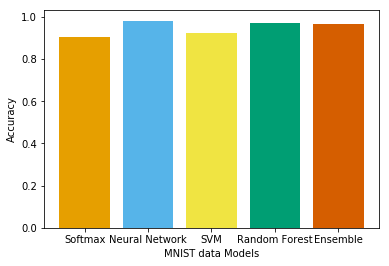

In [82]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
plot=[softmaxMNISTAcc,right/len(mnistPredictions),accuracy_svm,accuracy_forest,mnist_accuracy_maj_voting]
x = np.arange(5)
plt.bar(x, height= plot,color = colors)
plt.xticks(x, ['Softmax','Neural Network','SVM','Random Forest','Ensemble'])
plt.xlabel('MNIST data Models')
plt.ylabel('Accuracy')


Text(0,0.5,'Accuracy')

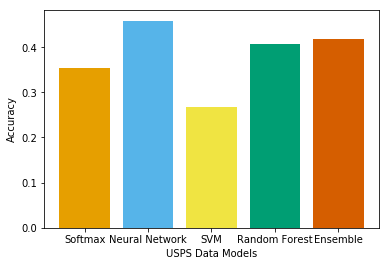

In [81]:
plot=[softmaxUSPSAcc,uright/len(uspsPrediction),usps_accuracy_svm,usps_accuracy_forest,usps_accuracy_maj_voting]
x = np.arange(5)
plt.bar(x, height= plot,color = colors)
plt.xticks(x, ['Softmax','Neural Network','SVM','Random Forest','Ensemble'])
plt.xlabel('USPS Data Models')
plt.ylabel('Accuracy')